In [41]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
path = "C:/SWdacon/minseo/data/"
csv_file = path+'train.csv'
train_img_path = path+'train_img/'

In [43]:
# RLE 디코딩 함수
def rle_decode(mask_rle, shape):
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape)

In [44]:
csv = pd.read_csv(csv_file)

In [73]:
img_num = 12

### generate mask image

In [74]:
mask_rle = csv.iloc[img_num, 2]
image_path = csv.iloc[img_num, 1]
image = cv2.imread(path+ image_path[2:])
mask = rle_decode(mask_rle, (image.shape[0], image.shape[1]))
x,y,_ = image.shape
image = image[:y//3,:x//3]
mask = mask[:y//3,:x//3]

In [75]:
contours = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]
result = image.copy()
for cntr in contours:
    x,y,w,h = cv2.boundingRect(cntr)
    cv2.rectangle(result, (x, y), (x+w, y+h), (0, 0, 255), 2)

In [79]:
def auto_canny(image, sigma=0.33):
    # image = cv2.GaussianBlur(image, (3, 3), 0)
	# compute the median of the single channel pixel intensities
    v = np.median(image)
	# apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)
	# return the edged image
    return edged

In [80]:
contours = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]
res = image.copy()

# for cntr in contours:
cntr = contours[3]
x,y,w,h = cv2.boundingRect(cntr)

cropped = res[y-10:y+h+10,x-10:x+w+10]
mask_cropped = mask[y-10:y+h+10,x-10:x+w+10]
cropped_gray = cv2.cvtColor(cropped,cv2.COLOR_BGR2GRAY)
edge = auto_canny(cropped_gray)

    # cv2.rectangle(res, (x, y), (x+w, y+h), (0, 0, 255), 2)

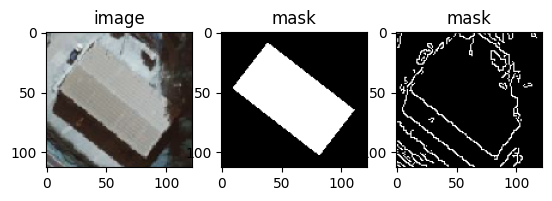

In [81]:
fig = plt.figure()
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(cropped)
ax1.set_title('image')
ax2 = fig.add_subplot(1,3,2)
ax2.imshow(mask_cropped,cmap='gray')
ax2.set_title('mask')
ax2 = fig.add_subplot(1,3,3)
ax2.imshow(edge,cmap='gray')
ax2.set_title('mask')
plt.show()

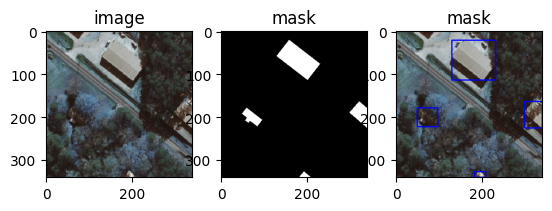

In [82]:
fig = plt.figure()
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(image)
ax1.set_title('image')
ax2 = fig.add_subplot(1,3,2)
ax2.imshow(mask,cmap='gray')
ax2.set_title('mask')
ax2 = fig.add_subplot(1,3,3)
ax2.imshow(result,cmap='gray')
ax2.set_title('mask')
plt.show()